Filtro Wiener

Se definen parámetros para el filtro y la señal de prueba

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.linalg import toeplitz

N = 500
L = 5 # Longitud/orden del filtro
n = np.arange(0,N,1.0)

Generación de la señal original (sin ruido)

In [72]:
xn = 20 + 0.05*n

ruido = np.random.randn(1,N) #ruido "blanco"
xn_r = xn + ruido

Estimiación de la correlación cruzada entre la señal ruidosa y la original

In [73]:
Rxy = signal.correlate(xn_r[0, :], xn)
Rxy = Rxy[N-1-L:N+L] #slicing
for i in range(-L,L+1):
    Rxy[i+L] = Rxy[i+L]/(N-abs(i))
Rxy = Rxy[L:]

Estimación de la autocorrelación de la señal ruidosa

In [74]:
Ryy = signal.correlate(xn_r[0,:], xn_r[0,:])
Ryy = Ryy[N-1-L:N+L]
for i in range(-L,L+1):
    Ryy[i+L] = Ryy[i+L]/(N-abs(i))
Ryy = Ryy[L:]
Ryy_matrix = toeplitz(Ryy)

Calculo de los coeficientes del filtro Wiener mediante ecuaciones de Wiener-Hopf y filtrado de la señal

In [75]:
w = np.matmul( np.linalg.inv(Ryy_matrix), Rxy )
print(w)
yn = signal.lfilter(w,1,xn_r)

[0.45071647 0.22628609 0.12930447 0.09340889 0.02640047 0.07495479]


Text(0.5, 1.0, 'Señal filtrada')

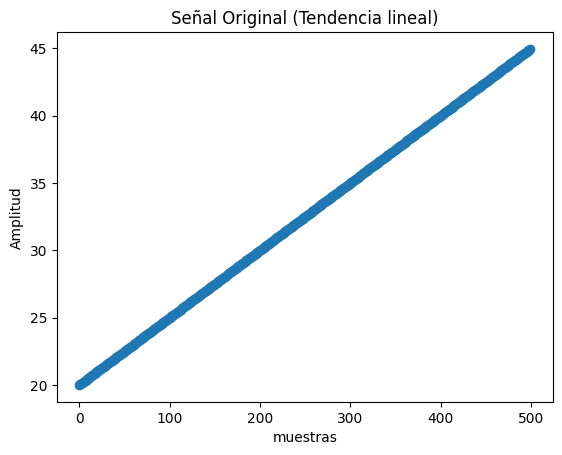

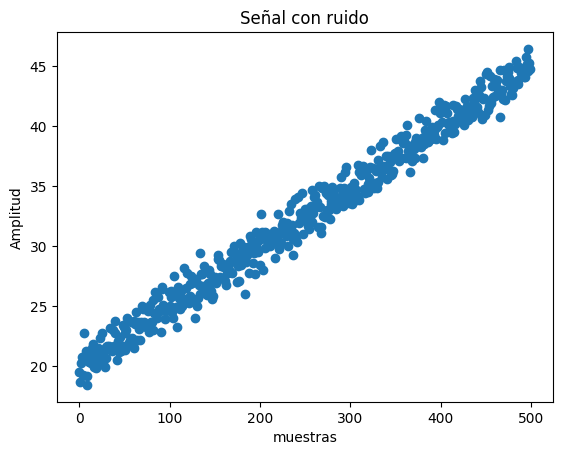

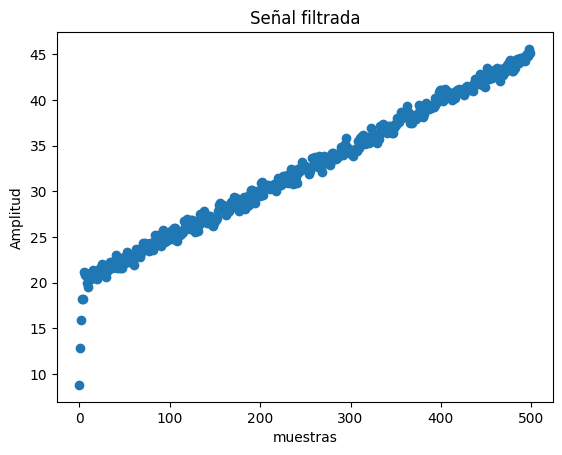

In [76]:
#señal
plt.figure(1)
plt.scatter(n,xn)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.title('Señal Original (Tendencia lineal)')

plt.figure(2)
plt.scatter(n,xn_r)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.title('Señal con ruido')

plt.figure(3)
plt.scatter(n,yn)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.title('Señal filtrada')